In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("/Users/yashsharma/Documents/ML/Course_Recomendation/udemy_course_data.csv")


In [13]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [16]:
df.shape

(3683, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

In [19]:
df=df.drop_duplicates()
df=df.dropna(subset=['course_title','subject','level','price','num_subscribers'])
df['price']=df['price'].replace('Free',0).astype(float)

df['profit']=df['num_subscribers']*df['price']

try:
  df['published_timestamp']=pd.to_datetime(df['published_timestamp'],format='ISO8601',errors='raise')
except ValueError:
  df['published_timestamp']=pd.to_datetime(df['published_timestamp'],errors='coerce')

df['published_date']=df['published_timestamp'].dt.date
df['published_time']=df['published_timestamp'].dt.time

df['year']=df['published_timestamp'].dt.year
df['month']=df['published_timestamp'].dt.month
df['day']=df['published_timestamp'].dt.day
df.reset_index(drop=True,inplace=True)

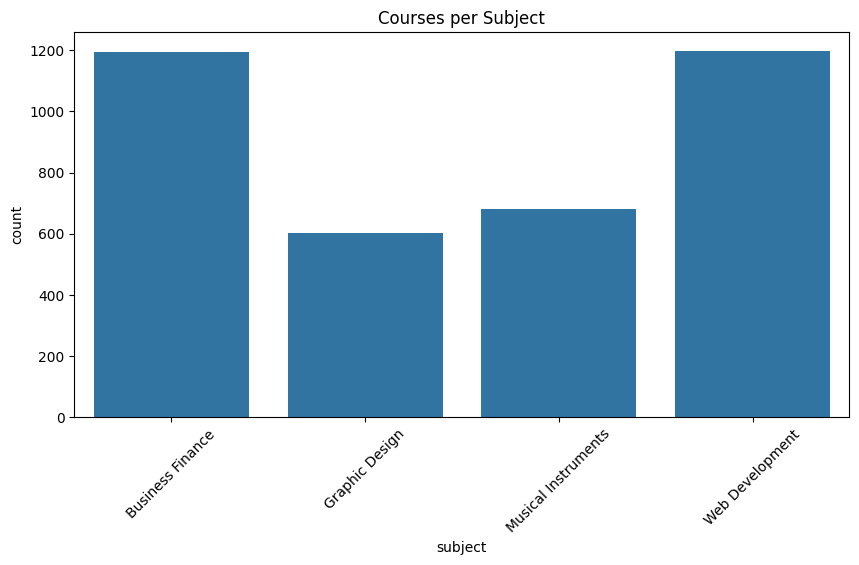

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='subject',data=df)
plt.title('Courses per Subject')
plt.xticks(rotation=45)
plt.show()

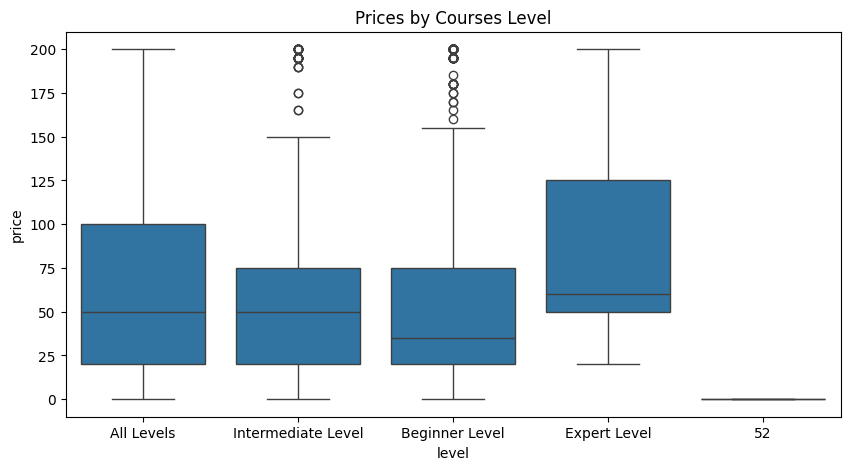

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='level',y='price',data=df)
plt.title('Prices by Courses Level')
plt.show()

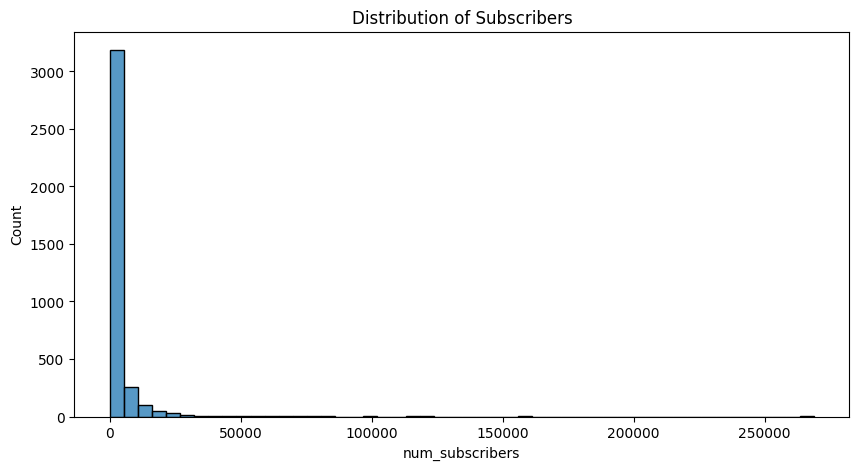

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_subscribers'],bins=50)
plt.title('Distribution of Subscribers')
plt.show()

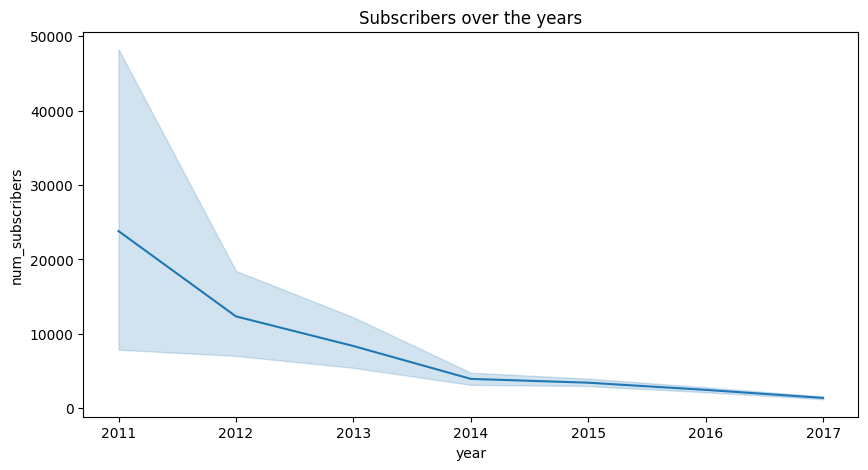

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='num_subscribers',data=df)
plt.title("Subscribers over the years")
plt.show()

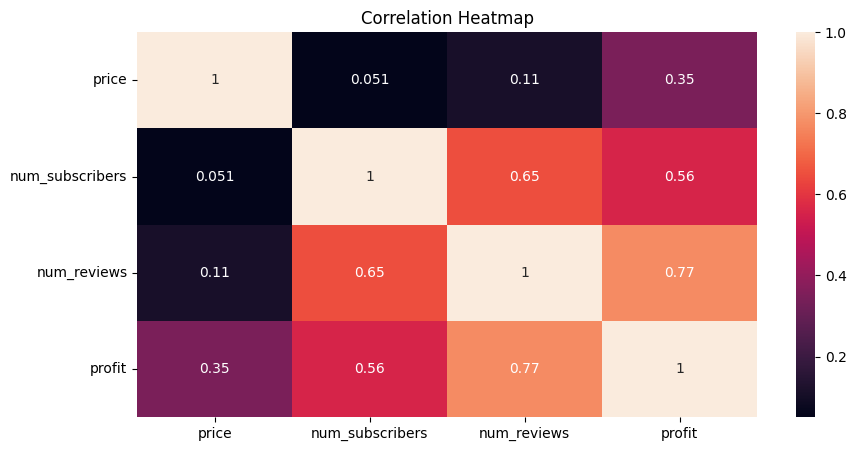

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['price','num_subscribers','num_reviews','profit']].corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

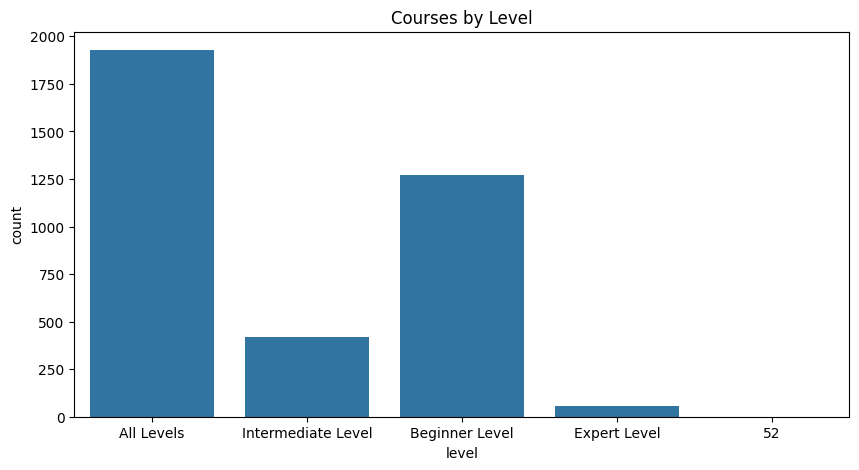

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='level',data=df)
plt.title('Courses by Level')
plt.show()

In [32]:
features=df[['course_title','subject','level']]

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [34]:
df['combined'] = df['course_title'] + ' ' +df['subject'] + ' '+ df['level']
tfidf= TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(df['combined'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices= pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [37]:
def recommend_course(title,cosine_sim=cosine_sim):
  title=title.strip().lower()
  idx=indices[indices.index.str.strip().str.lower()]
  if idx.empty:
    print(f"Course Title '{title}' not found in the dataset.")
    return pd.DataFrame
  idx=idx.iloc[0]
  sim_scores=list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores=sim_scores[1:6]

  course_indices=[i[0] for i in sim_scores]
  return df[['course_title','subject','level']].iloc[course_indices]

In [44]:
recommend_courses("Ultimate Investment Banking Course")


In [45]:
sample_titles=df['course_title'].sample(3).values
for title in sample_titles:
  print("\nRecommended for:",title)
  print(recommend_courses(title))


Recommended for: React JS and Redux - Mastering Web Apps
None

Recommended for: สอนเทรดไบนารี่ อ๊อฟชั่นอย่างง่าย
None

Recommended for: From Drawing to Illustration
None


In [46]:
course_title="Financial Modelling for business Analysts"
if course_title in indices:
  print(recommend_courses(course_title))
else:
  print("courses not found in dataset")

courses not found in dataset


In [50]:
import pickle

with open('tfidf_vectorizer.pkl','wb') as f :
    pickle.dump(tfidf,f)

with open('cosine_similarity.pkl','wb') as f :
    pickle.dump(cosine_simf,f)

df.to_csv('processed_course_data.csv' ,index=False)

NameError: name 'cosine_simf' is not defined